<a href="https://colab.research.google.com/github/Tonniah/TW/blob/main/APT_3025_PROJECT_HANDWRITING_DIGIT_RECOGNITION_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Step 1:*** Loading and Viewing the Dataset
We begin by loading the dataset and inspecting its structure.  
Explanation:

***pd.read_csv():*** This function reads a CSV file into a DataFrame (table-like structure). Here, it's reading the training and testing data.
.shape: Displays the dimensions of the dataset (e.g., number of rows and columns).
.head(): Shows the first 5 rows of the dataset to check the format.

In [2]:
import pandas as pd

# Load the MNIST dataset (train and test data)
train_data = pd.read_csv('mnist_train.csv')  # Path to your train.csv
test_data = pd.read_csv('mnist_test.csv')    # Path to your test.csv

# Check the structure of the dataset
print(train_data.shape)  # Display the shape (rows, columns)
print(train_data.head())  # Display first 5 rows of training data


(60000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


***Step 2:*** Exploratory Data Analysis (EDA)
Now, we'll visualize the distribution of labels and display a few sample images.

-This code visualizes the distribution of labels (digits
0-9). It creates a histogram where the x-axis represents the labels and the y-axis shows how many times each label appears.

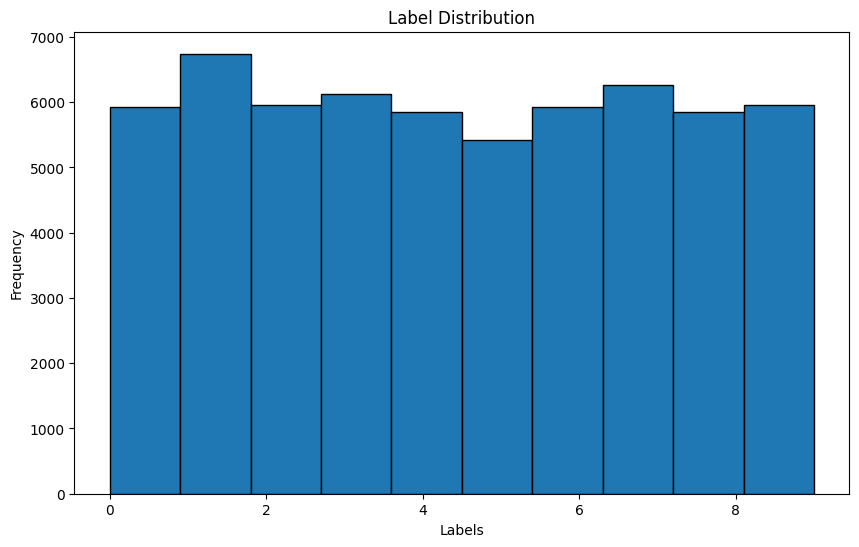

In [3]:
import matplotlib.pyplot as plt

# Histogram of label distribution
plt.figure(figsize=(10, 6))
plt.hist(train_data['label'], bins=10, edgecolor='k')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()


***iloc[i, 1:]:***  This selects the image data (everything except the first column, which is the label).

***reshape(28, 28):***  The data in the CSV is flattened into 1D (784 values for each image), so we reshape it back into 28x28 (2D) to visualize as an image.

***imshow():*** Displays the image in grayscale.

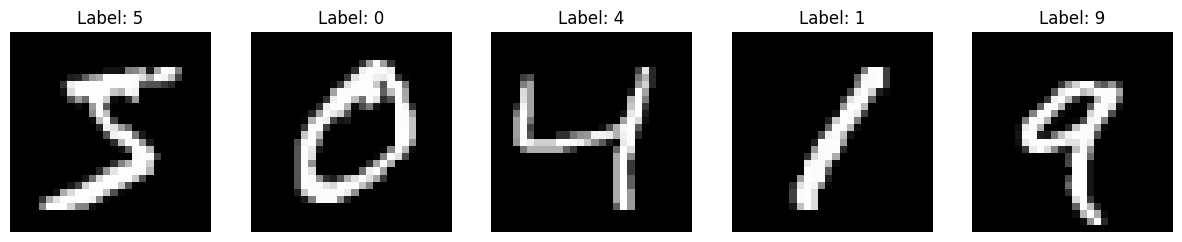

In [4]:
import numpy as np

# Visualize the first 5 images
def visualize_images(data, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image_data = data.iloc[i, 1:].values  # Exclude the label column
        image = image_data.reshape(28, 28)  # Reshape into 28x28 image
        axes[i].imshow(image, cmap='gray')  # Display image in grayscale
        axes[i].axis('off')  # Hide axis
        axes[i].set_title(f"Label: {data.iloc[i, 0]}")  # Display the label
    plt.show()

# Display first 5 images from training data
visualize_images(train_data)


***Step 3:*** Preprocessing the Data
Now, we will prepare the data by normalizing the pixel values and encoding the labels.

***Normalization:*** Pixel values are between 0 and 255, so dividing by 255 scales the values to between 0 and 1.

***Reshaping:*** The model expects input in the shape of (28, 28, 1) where the first two dimensions are the image size (28x28 pixels) and the last dimension is the number of color channels (1 for grayscale).

In [5]:
# Extract features (images) and labels
X_train = train_data.iloc[:, 1:].values  # All columns except the first (label column)
y_train = train_data['label'].values  # Only the label column

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0  # Pixel values range from 0 to 255, divide by 255 to normalize

# Reshape the features into 28x28x1 format (28x28 pixels, 1 color channel for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)


***Step 4:*** Building the Model
We will build a Convolutional Neural Network (CNN) with batch normalization and dropout for regularization.

***Conv2D:*** This is a 2D convolutional layer, which is commonly used for image data. We use two convolution layers here, the first with 32 filters and the second with 64 filters.

***BatchNormalization:***This normalizes the activations of each layer to speed up training and improve generalization.

***MaxPooling2D:*** This layer performs downsampling (reducing the image size), keeping the most important features.

***Dense:*** Fully connected layers at the end. The final layer has 10 neurons for each digit (0-9).Dropout:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output neurons for digits 0-9
])

model.summary()  # Display the model summary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

***Step 5:*** Model Compilation and Training
Now we will compile and train the model.

***Compile:*** We use the Adam optimizer (a common choice), sparse categorical cross-entropy loss (since this is a classification problem with multiple classes), and accuracy as the metric.

***Fit:*** We train the model for 10 epochs with a batch size of 64 and use 20% of the data as a validation set.

In [7]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.7947 - loss: 0.6841 - val_accuracy: 0.9787 - val_loss: 0.0788
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9551 - loss: 0.1545 - val_accuracy: 0.9862 - val_loss: 0.0469
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.9686 - loss: 0.1070 - val_accuracy: 0.9860 - val_loss: 0.0479
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9741 - loss: 0.0933 - val_accuracy: 0.9882 - val_loss: 0.0444
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9782 - loss: 0.0767 - val_accuracy: 0.9874 - val_loss: 0.0479
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9787 - loss: 0.0725 - val_accuracy: 0.9885 - val_loss: 0.0471
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9800 - loss: 0.0679 - val_accuracy: 0.9890 - val_loss: 0.0499
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9818 - loss: 0.0590 - 

***Step 6:*** Evaluate the Model
After training, we will evaluate the model’s performance.

***classification_report:*** This shows key metrics like precision, recall, and F1-score for each digit class.

***confusion_matrix:*** This visualizes how well the model predicted each digit. Diagonal values show correct predictions, while off-diagonal values indicate misclassifications.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      0.99      0.99      5958
           3       0.99      1.00      1.00      6131
           4       1.00      0.99      0.99      5842
           5       1.00      0.99      0.99      5421
           6       1.00      1.00      1.00      5918
           7       1.00      0.99      0.99      6265
           8       0.99      1.00      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



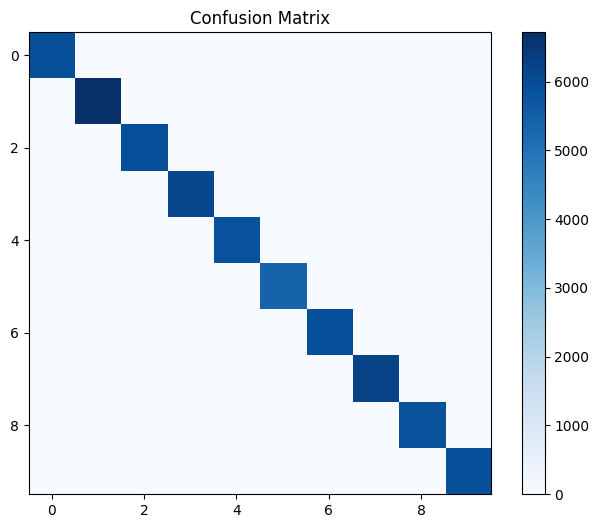

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the training data (or test data if available)
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Classification report
print(classification_report(y_train, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.show()


***Step 7:*** Data Augmentation
To improve generalization, we'll apply data augmentation.

***ImageDataGenerator:*** This class allows you to augment images in real-time during training.

We apply transformations such as rotation, shifting, and zooming to artificially increase the diversity of our training set.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Define data augmentation strategy
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    zoom_range=0.2,  # Randomly zoom images
)

# Fit the data generator to the training data
datagen.fit(X_train)

# Create training and validation data generators
train_generator = datagen.flow(X_train, y_train, batch_size=64)
validation_generator = datagen.flow(X_val, y_val, batch_size=64) #No augmentation for validation

# Train the model with augmented data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.6781 - loss: 1.1590 - val_accuracy: 0.9118 - val_loss: 0.2919
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 115ms/step - accuracy: 0.8511 - loss: 0.4766 - val_accuracy: 0.9359 - val_loss: 0.2104
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 111ms/step - accuracy: 0.8835 - loss: 0.3790 - val_accuracy: 0.9452 - val_loss: 0.1860
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 154s 128ms/step - accuracy: 0.8981 - loss: 0.3307 - val_accuracy: 0.9500 - val_loss: 0.1716
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 113ms/step - accuracy: 0.9088 - loss: 0.3028 - val_accuracy: 0.9548 - val_loss: 0.1562
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 137s 107ms/step - accuracy: 0.9136 - loss: 0.2845 - val_accuracy: 0.9537 - val_loss: 0.1579
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9185 - loss: 0.2737 - val_accuracy: 0.9594 - val_loss: 0.1301
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9228 - loss: 0.2570 -

***Step 8:*** Save the Model for Deployment
After training the model, we save it for reuse.

***model.save():*** This saves the entire model (architecture, weights, optimizer state) in an .h5 file format for later use.

In [12]:
# Save the trained model
model.save('digit_recognition_model.h5')


***Summary:***
-Dataset Loading: We loaded the MNIST dataset and checked its structure.

-EDA: We visualized the label distribution and inspected sample images.

-Preprocessing: Normalized image data, reshaped it, and prepared labels.

-Modeling: Built a CNN with dropout and batch normalization layers.

-Evaluation: Evaluated the model with classification metrics and confusion matrix.

-Augmentation: Applied real-time data augmentation to improve model generalization.

-Deployment: Saved the model for future use.

Epoch refers to how many times the entire dataset is passed through the model.